# TP03 - CCF 726
* **Nome:** Matheus Freitas Martins
* **Matrícula:** ES111281

# Instalando e importando as dependências

In [1]:
!pip install -U ydata-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Comando para exibir gráficos e visualizações dentro do próprio notebook, ao invés de abri-los em uma janela externa.
%matplotlib inline

In [5]:
!pip install mlflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import mlflow
import os
import mlflow.h2o
import h2o
import numpy as np
import random
import seaborn as sns
import shap

from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from h2o.automl import H2OAutoML
from sklearn.model_selection import cross_val_score
from mlflow.exceptions import MlflowException
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, explained_variance_score

# Carregando o conjunto de dados

In [7]:
df = pd.read_csv("salarios-ciencia-dados.csv")

# Analisando os dados

In [8]:
df.isnull().sum()

#ano_trabalho           0
nivel_experiencia       0
tipo_emprego            0
titulo_trabalho         0
salario                 0
moeda_salario           0
salario_em_dolar        0
residencia_empregado    0
percentual_remoto       0
local_empresa           0
tamanho_empresa         0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   #ano_trabalho         3755 non-null   int64 
 1   nivel_experiencia     3755 non-null   object
 2   tipo_emprego          3755 non-null   object
 3   titulo_trabalho       3755 non-null   object
 4   salario               3755 non-null   int64 
 5   moeda_salario         3755 non-null   object
 6   salario_em_dolar      3755 non-null   int64 
 7   residencia_empregado  3755 non-null   object
 8   percentual_remoto     3755 non-null   int64 
 9   local_empresa         3755 non-null   object
 10  tamanho_empresa       3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [10]:
df.describe()

,#ano_trabalho,salario,salario_em_dolar,percentual_remoto
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [11]:
df.head()

,#ano_trabalho,nivel_experiencia,tipo_emprego,titulo_trabalho,salario,moeda_salario,salario_em_dolar,residencia_empregado,percentual_remoto,local_empresa,tamanho_empresa
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


Exibindo os cargos únicos da coluna **titulo_trabalho**

In [12]:
print(df['titulo_trabalho'].unique())

['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine Learning Scientist'
 'Lead Data Scientist' 'Cloud Database Engineer' 'Financial Data Analyst'
 'Data Infrastructure Engineer' 'Software Data Engine

Contando a quantidade de pessoas em cada título de trabalho.

In [13]:
pd.set_option('display.max_rows', None)
print(df['titulo_trabalho'].value_counts())

Data Engineer                               1040
Data Scientist                               840
Data Analyst                                 612
Machine Learning Engineer                    289
Analytics Engineer                           103
Data Architect                               101
Research Scientist                            82
Data Science Manager                          58
Applied Scientist                             58
Research Engineer                             37
ML Engineer                                   34
Data Manager                                  29
Machine Learning Scientist                    26
Data Science Consultant                       24
Data Analytics Manager                        22
Computer Vision Engineer                      18
AI Scientist                                  16
BI Data Analyst                               15
Business Data Analyst                         15
Data Specialist                               14
BI Developer        

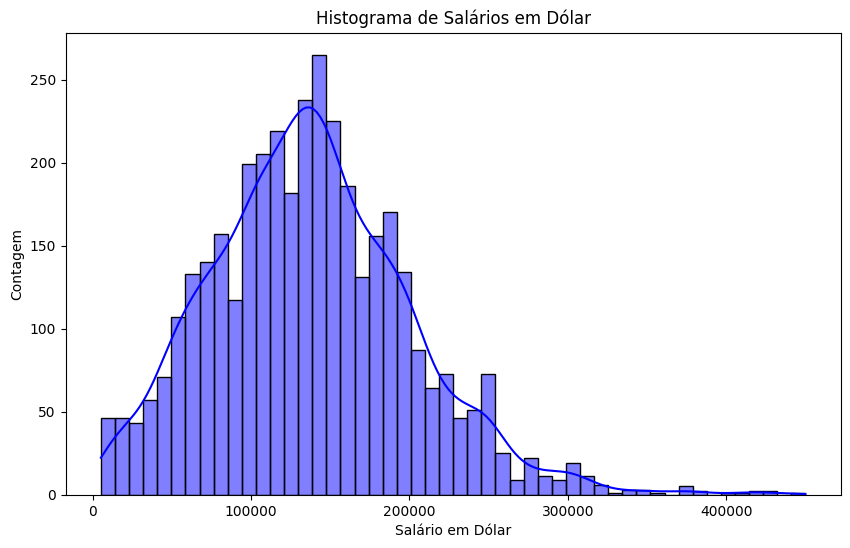

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(df['salario_em_dolar'], bins=50, color='blue', kde=True)
plt.title('Histograma de Salários em Dólar')
plt.xlabel('Salário em Dólar')
plt.ylabel('Contagem')
plt.show()


<Axes: xlabel='salario_em_dolar'>

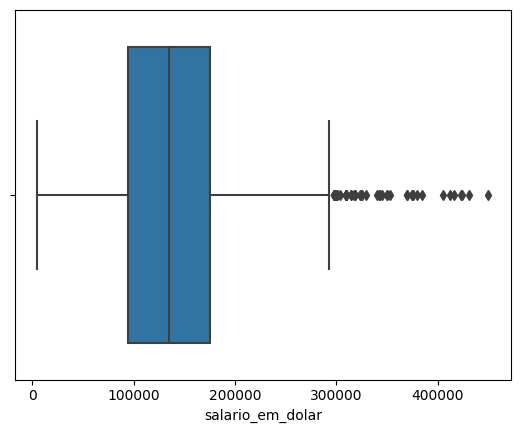

In [15]:

sns.boxplot(x=df['salario_em_dolar'])


## Calculando a matriz de correlação

In [16]:
correlation_matrix = df.corr(numeric_only=True)

# Exibindo as correlações com a coluna alvo
correlation_with_target = correlation_matrix['salario_em_dolar'].abs().sort_values(ascending=False)

print(correlation_with_target)

salario_em_dolar     1.000000
#ano_trabalho        0.228290
percentual_remoto    0.064171
salario              0.023676
Name: salario_em_dolar, dtype: float64


## Gerando o Data Profiling para uma melhor visualização

In [17]:
profile = ProfileReport(df, title="Salarios Data Profiling Report", explorative=True)
profile.to_widgets()

In [18]:
profile.to_file("salarios_data_profiling_report.html")

## Insights gerais sobre o conjunto de dados:

* A variável alvo para a previsão é **salario_em_dolar**, que é um número real, varia de 5132 a 450000 dólares, com uma média de 137570.39 dólares.

* Como a coluna **salario_em_dolar** e a coluna **salario** estão altamente correlacionadas, a exclusão de **salario** pode ser feita para evitar multicolinearidade. 

* O dataset possui 3755 entradas e 11 features.

* Não há dados faltantes, e todas as entradas estão preenchidas. 

* 14,5% dos dados são duplicados.

* **tipo_emprego** é uma coluna é altamente desbalanceada, com 95.3% dos registros pertencendo a uma única categoria. Isso significa que a maioria dos empregos no conjunto de dados são de um determinado tipo.

* **moeda_salario** é uma coluna também é altamente desbalanceada, com 79.0% dos registros numa única categoria. Isto significa que a maioria dos salários no conjunto de dados é paga em uma única moeda.

* **tamanho_empresa** é uma coluna é desbalanceada, com 51.8% dos registros numa única categoria. Isto indica que mais da metade das empresas no conjunto de dados são de um determinado tamanho. 

## Insights individuais sobre cada coluna:

## #ano_trabalho
Indica referir-se ao ano em que o empregado começou a trabalhar na posição atual. Há quatro anos distintos no conjunto de dados: **2020, 2021, 2022 e 2023**. 

Sendo que: 

* **2023**: Este é o ano mais frequente no conjunto de dados, com 1785 ocorrências. Isso indica que a maior parte dos dados foi coletada em 2023.
* **2022**: O segundo ano mais comum, com 1664 ocorrências.
* **2021**: Este ano tem significativamente menos ocorrências do que 2023 e 2022, com apenas 230 ocorrências.
* **2020**: Este é o ano menos comum no conjunto de dados, com apenas 76 ocorrências.

Se o salário mudou significativamente ao longo dos anos devido à inflação, tendências da indústria ou outros fatores, o modelo pode ser enviesado para as tendências mais recentes, já que os dados de 2023 e 2022 são os mais representados. 

## Nivel_Experiencia

Os valores **"SE", "MI", "EN", "EX"** indicam ser abreviações referentes ao nível de experiência de um indivíduo. 

Suposições: 

* **SE:** Representa "**Se**nior", um indivíduo com muita experiência em seu campo. **Indica que a maioria dos indíviduos são seniors, pois possui 2516 ocorrências.**

* **MI:** Representa "**Mi**d" ou "Intermediário", um indivíduo que tem uma quantidade moderada de experiência. Indica que é o segundo nível com mais indivíduos, pois possui **805** ocorrências.

* **EN:** Representa "**En**try" (Iniciante), um indivíduo que é novo no campo ou tem poucos anos de experiência.  Indica que é o terceiro nível com mais indivíduos, pois possui **320** ocorrências.

* **EX:** Representa "**Ex**pert" (Especialista), um indivíduo com um nível extremamente alto de habilidade ou experiência. Indica que é o nível com menos indivíduos, pois possui apenas **114** ocorrências.

Podemos esperar que os indivíduos classificados como **SE** ou **EX** tenham salários mais altos, em média, do que aqueles classificados como **MI** ou **EN**. No entanto, a predominância de indivíduos classificados como **SE** pode fazer com que o modelo seja menos preciso ao prever salários para os outros níveis de experiência.


## tipo_emprego
Provavelmente se refere ao tipo de contrato de trabalho do empregado. 

Suposição da interpretação das siglas:

* **FT: Full-Time** (Tempo integral) representa o tipo de emprego mais comum no conjunto de dados, com 3718 ocorrências. Isso significa que a grande maioria dos empregados no conjunto de dados trabalha em tempo integral. **Está desbalanceado por conta da maioria dos trabalhadores serem dessa categoria**
* **PT: Part-Time** (Meio período) representa um tipo de emprego muito raro no conjunto de dados, com apenas 17 ocorrências.
* **CT: Contract** (Contrato) representa um tipo de emprego também bastante raro, com apenas 10 ocorrências.
* **FL: Freelance**  representa um tipo de emprego também bastante raro, com apenas 10 ocorrências.

Os empregados em tempo integral geralmente ganham mais do que os empregados em meio período, contratados ou freelancers.


## titulo_trabalho
Representa uma feature textual que descreve o cargo de um funcionário em sua organização. Há 93 títulos de trabalho distintos, o que representa 2,5% de todos os valores possíveis.

* **Data Engineer** é o título mais comum com 598 ocorrências.
* **Data Scientist** e **Data Analyst** também são bastante comuns, com 538 e 396 ocorrências respectivamente.
* **Machine Learning Engineer** tem 206 ocorrências.

Vale ressaltar que há uma série de títulos de trabalho que ocorrem com menos frequência, alguns ocorrem apenas uma vez no conjunto de dados.

A variedade de títulos de trabalho sugere uma diversidade de papéis no campo de dados e aprendizado de máquina. Cada título pode implicar uma combinação específica de habilidades, responsabilidades e nível de senioridade.

## moeda_salario
Há 20 moedas distintas no conjunto de dados.

Observações: 
* Está altamente correlacionada com a coluna salario.
* Os valores nesta coluna estão desbalanceados. Em outras palavras, algumas moedas são muito mais comuns do que outras.

Analisando as frequências das moedas:

* A maioria dos salários **(3224)** está em dólares americanos **(USD)**. **Está desbalanceada por conta da maioria ser desse tipo de moeda.**
* A segunda moeda mais comum é o euro **(EUR)**, com **236 ocorrências.**
* A libra esterlina **(GBP)** é a terceira moeda mais comum, com **161 ocorrências.**
* Há também salários em rupias indianas **(INR, 60 ocorrências)** e dólares canadenses **(CAD, 25 ocorrências).**
* Existem outras **15 moedas que são menos comuns, com um total de 49 ocorrências.**


## salario_em_dolar
Representa o salário dos funcionários convertido para dólares americanos. Esta coluna contém números reais e tem 1035 valores distintos.

* Não há salários iguais a zero e não há salários negativos.

Pelo que parece, essa coluna já passou por uma etapa de limpeza de dados. Salários em diferentes moedas foram provavelmente convertidos para dólares americanos usando taxas de câmbio apropriadas.

Informações relevantes: 
* **Minimum**: É o valor mínimo na coluna. Neste caso, o **menor salário em dólar é $5132**.

* **5-th percentile**: 5% de todos os salários são menores ou iguais a $40143.7.

* **Q1**: É o primeiro quartil, 25% dos salários são menores ou iguais a $95000.

* **Median**: É o segundo quartil ou mediana, **50% dos salários são menores ou iguais a $135000**.

* **Q3**: É o terceiro quartil, 75% dos salários são menores ou iguais a $175000.

* **95-th percentile**: 95% de todos os salários são menores ou iguais a $249360.

* **Maximum**: É o valor máximo na coluna. Neste caso, **o maior salário em dólar é $450000**.


## residencia_empregado
Indica o país de residência do funcionário.

Existem 78 países distintos onde os funcionários residem. Os cinco principais países onde os funcionários residem são:
* **Estados Unidos (us)**
* **Reino Unido (gb)**
* **Canadá (ca)**
* **Espanha (es)**
* **Índia (in).**

**Esses cinco países representam mais de 90% de todos os empregados.** No entanto, ainda existem funcionários em muitos outros países (68 no total)

## percentual_remoto
Representa o grau de trabalho remoto em cada emprego. É uma feature categórica com três valores possíveis: 0%, 50% e 100%.

Pode-se supor que esses valores representam:
* **0%:** Indica que o emprego não é remoto, ou seja, o empregado deve trabalhar fisicamente no local da empresa.

* **50%:** Sugere que o emprego é parcialmente remoto (Híbrido).

* **100%:** Significa que o trabalho é totalmente remoto. 

Observações:

A maioria dos trabalhos **(51,2%) no conjunto de dados não é remota**, enquanto uma considerável proporção **(43,8%) é totalmente remota**. Apenas **5,0% dos trabalhos são parcialmente remotos**. Isso sugere que, em geral, os empregos tendem a ser ou totalmente presenciais ou totalmente remotos, com poucos sendo uma combinação de ambos.

## local_empresa
Indica o local onde a empresa está fisicamente localizada. Ele contém 72 valores distintos, o que sugere que os empregados trabalham para empresas localizadas em 72 países diferentes.

Os valores mais comuns são:

* **"us"**: Indica que a empresa está localizada nos Estados Unidos. **Esse é o local mais comum, abrangendo 81% dos empregados no conjunto de dados.**

* **"gb"**: Indica que a empresa está localizada no Reino Unido, abrangendo 4,6% dos empregados.

* **"ca"**: Indica que a empresa está localizada no Canadá, abrangendo 2,3% dos empregados.

* **"es"**: Indica que a empresa está localizada na Espanha, abrangendo 2,1% dos empregados.

* **"in"**: Indica que a empresa está localizada na Índia, abrangendo 1,5% dos empregados.

* **"de"**: Indica que a empresa está localizada na Alemanha, também abrangendo 1,5% dos empregados.

* **"fr"**: Indica que a empresa está localizada na França, abrangendo 0,9% dos empregados.

Os outros 5% dos empregados trabalham para empresas localizadas em 62 outros países, incluindo Brasil, Portugal, Grécia, e outros. 

OBS: **É importante notar que "local_empresa" pode não necessariamente refletir onde os empregados estão fisicamente trabalhando, especialmente para os empregados que trabalham remotamente.**

## tamanho_empresa
Indica o tamanho da empresa onde o funcionário trabalha. Esta variável é categórica e tem três valores distintos:

* **"M"**: Provavelmente se refere a empresas de porte médio. **Este é o tipo mais comum no conjunto de dados, representando 84,0% dos registros.** Está bastante desbalanceada, pois a maioria das observações se enquadram na categoria.

* **"L"**: Provavelmente se refere a empresas de grande porte. Elas representam 12,1% dos registros no conjunto de dados.

* **"S"**: Provavelmente se refere a pequenas empresas. Elas representam 3,9% dos registros no conjunto de dados.

A partir destas informações, pode-se concluir que a maioria dos funcionários neste conjunto de dados trabalha para empresas de porte médio.

## salario
Possui alta correlação com **salario_em_dolar** e **moeda_salario**.

**salario_em_dolar** indica ser uma conversão direta do **salario** original para dólares, então já que temos as informações necessárias, a coluna **salario** é descartável.


# Configurando MLFLOW

In [19]:
def get_run_count(run_name):
    runs = mlflow.search_runs(filter_string=f"tags.mlflow.runName LIKE '{run_name}%'")
    return len(runs)

def create_new_run_name(run_name):
    run_count = get_run_count(run_name)
    if run_count > 0:
        return f"{run_name} ({run_count})"
    else:
        return run_name

In [20]:
# Credenciais para mlflow em servidor dedicado
os.environ['MLFLOW_TRACKING_URI'] = "https://dagshub.com/mtsfreitas/ccf726tp3.mlflow"
os.environ['MLFLOW_TRACKING_USERNAME'] = "mtsfreitas"
os.environ['MLFLOW_TRACKING_PASSWORD'] = "560d3339c3aabe315db809e39213cf93e300f164"

In [21]:
# Indica o local onde os resultados dos experimento serão armazenados
mlflow.set_tracking_uri(os.environ['MLFLOW_TRACKING_URI'])

In [22]:
# Configura a plataforma MLflow para armazenar os resultados de um experimento chamado
# "ChurnRisk" e, em seguida, pesquisa as execuções (runs) realizadas neste experimento.
experiment_name = "SalarioEmDolar"
mlflow_experiment = mlflow.set_experiment(experiment_name)
runs = mlflow.search_runs([mlflow_experiment._experiment_id])

In [23]:
runs

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.r2,metrics.mae,metrics.rmsle,metrics.mse,...,params.random_state,params.max_depth,params.feature,params.features,tags.mlflow.log-model.history,tags.mlflow.source.name,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.runName,tags.mlflow.parentRunId
0,5d69044dba714256a1e9fbcf33732117,0,FINISHED,mlflow-artifacts:/f2b99b329c8040c0b9bebb154a7a...,2023-06-12 00:35:30.219000+00:00,2023-06-12 00:35:39.381000+00:00,0.000003,52953.703355,0.678147,4.505596e+09,...,None,None,None,None,"[{""run_id"": ""5d69044dba714256a1e9fbcf33732117""...",/usr/local/lib/python3.10/dist-packages/ipyker...,mtsfreitas,LOCAL,H2O (129),None
1,929ffb5259a14e3b9be75962b613e69a,0,FINISHED,mlflow-artifacts:/f2b99b329c8040c0b9bebb154a7a...,2023-06-12 00:35:21.592000+00:00,2023-06-12 00:35:29.121000+00:00,0.591362,31377.937973,NaN,1.841166e+09,...,None,None,None,None,"[{""run_id"": ""929ffb5259a14e3b9be75962b613e69a""...",/usr/local/lib/python3.10/dist-packages/ipyker...,mtsfreitas,LOCAL,H2O (128),None
2,24c3753f1c2746de98f79427aaaa8d53,0,FINISHED,mlflow-artifacts:/f2b99b329c8040c0b9bebb154a7a...,2023-06-12 00:35:10.931000+00:00,2023-06-12 00:35:19.382000+00:00,0.396632,38708.943942,0.463277,2.718539e+09,...,None,None,None,None,"[{""run_id"": ""24c3753f1c2746de98f79427aaaa8d53""...",/usr/local/lib/python3.10/dist-packages/ipyker...,mtsfreitas,LOCAL,H2O (127),None
3,b7d9dae48bf74b6eafd5af8496e39cb9,0,FINISHED,mlflow-artifacts:/f2b99b329c8040c0b9bebb154a7a...,2023-06-12 00:35:02.096000+00:00,2023-06-12 00:35:09.622000+00:00,0.402423,38217.959876,0.458984,2.692449e+09,...,None,None,None,None,"[{""run_id"": ""b7d9dae48bf74b6eafd5af8496e39cb9""...",/usr/local/lib/python3.10/dist-packages/ipyker...,mtsfreitas,LOCAL,H2O (126),None
4,5409b6ac5e8b48c6aa9ec7b89359fee1,0,FINISHED,mlflow-artifacts:/f2b99b329c8040c0b9bebb154a7a...,2023-06-12 00:34:50.288000+00:00,2023-06-12 00:35:01.098000+00:00,0.441665,37388.234915,0.453663,2.515639e+09,...,None,None,None,None,"[{""run_id"": ""5409b6ac5e8b48c6aa9ec7b89359fee1""...",/usr/local/lib/python3.10/dist-packages/ipyker...,mtsfreitas,LOCAL,H2O (125),None
5,14f3c75992234fb48967f7f6537916df,0,FINISHED,mlflow-artifacts:/f2b99b329c8040c0b9bebb154a7a...,2023-06-12 00:34:41.854000+00:00,2023-06-12 00:34:49.341000+00:00,0.569952,32322.826504,NaN,1.937628e+09,...,None,None,None,None,"[{""run_id"": ""14f3c75992234fb48967f7f6537916df""...",/usr/local/lib/python3.10/dist-packages/ipyker...,mtsfreitas,LOCAL,H2O (124),None
6,ca814d018d0f49bc8cc8ddb515bfced1,0,FINISHED,mlflow-artifacts:/f2b99b329c8040c0b9bebb154a7a...,2023-06-12 00:34:31.900000+00:00,2023-06-12 00:34:40.270000+00:00,0.564613,32926.269275,NaN,1.961684e+09,...,None,None,None,None,"[{""run_id"": ""ca814d018d0f49bc8cc8ddb515bfced1""...",/usr/local/lib/python3.10/dist-packages/ipyker...,mtsfreitas,LOCAL,H2O (123),None
7,5e966862dbc6405f9697b669ac37dd1f,0,FINISHED,mlflow-artifacts:/f2b99b329c8040c0b9bebb154a7a...,2023-06-12 00:34:21.710000+00:00,2023-06-12 00:34:30.464000+00:00,0.529321,34171.198844,0.394098,2.120698e+09,...,None,None,None,None,"[{""run_id"": ""5e966862dbc6405f9697b669ac37dd1f""...",/usr/local/lib/python3.10/dist-packages/ipyker...,mtsfreitas,LOCAL,H2O (122),None
8,f7b20cbc220c41d4a35e3370390e4c70,0,FINISHED,mlflow-artifacts:/f2b99b329c8040c0b9bebb154a7a...,2023-06-12 00:34:11.828000+00:00,2023-06-12 00:34:20.511000+00:00,0.556818,33077.960895,0.373705,1.996804e+09,...,None,None,None,None,"[{""run_id"": ""f7b20cbc220c41d4a35e3370390e4c70""...",/usr/local/lib/python3.10/dist-packages/ipyker...,mtsfreitas,LOCAL,H2O (121),None
9,9048d32209814ce7bf26288e572b1005,0,FINISHED,mlflow-artifacts:/f2b99b329c8040c0b9bebb154a7a...,2023-06-12 00:34:00.047000+00:00,2023-06-12 00:34:09.761000+00:00,0.531433,33941.020665,0.389609,2.111181e+09,...,None,None,None,None,"[{""run_id"": ""9048d32209814ce7bf26288e572b1005""...",/usr/local/lib/python3.10/dist-packages/ipyker...,mtsfreitas,LOCAL,H2O (132),None


# Engenharia de Atributos

Transformando a variável **ano_trabalho** em uma medida de **anos de experiência**

In [24]:
df['anos_experiencia'] = df['#ano_trabalho'] - df['#ano_trabalho'].max()

Descartando a coluna **ano_trabalho** para evitar a multicolinearidade, uma vez que foi criado a coluna **anos_experiencia** a partir da coluna **ano_trabalho**

In [25]:
df = df.drop(columns=['#ano_trabalho'])

Limpando 544 **(14.5%) linhas duplicadas**

In [26]:
df = df.drop_duplicates()

A variável **moeda_salario** pode ser convertida em uma variável binária indicando se a moeda é o dólar ou não.

In [27]:
df['moeda_salario'] = df['moeda_salario'].apply(lambda x: 1 if x == 'USD' else 0)

Atribui a cada categoria única um valor numérico 

In [28]:
label_encoder = LabelEncoder()

df['nivel_experiencia'] = label_encoder.fit_transform(df['nivel_experiencia'])
df['tipo_emprego'] = label_encoder.fit_transform(df['tipo_emprego'])
df['moeda_salario'] = label_encoder.fit_transform(df['moeda_salario'])
df['residencia_empregado'] = label_encoder.fit_transform(df['residencia_empregado'])
df['local_empresa'] = label_encoder.fit_transform(df['local_empresa'])
df['tamanho_empresa'] = label_encoder.fit_transform(df['tamanho_empresa'])
df['titulo_trabalho'] = label_encoder.fit_transform(df['titulo_trabalho'])

Removendo a coluna **salario**, pois não é necessário se estivermos tentando prever **salario_em_dolar**


In [29]:
df = df.drop(columns=['salario'])

# Escolha do modelo de Regressão

**RandomForestRegressor** foi escolhido por ser um bom algoritmo de aprendizado de máquina para esse tipo de tarefa, pois pode lidar com dados categóricos e numéricos. Além disso, não requer normalização de dados e não é muito sensível a outliers.

In [31]:
# Definindo os valores de cv e random_state
cv_value = 6
random_state_value = 42

# Definindo X e y
X = df.drop(columns=['salario_em_dolar'])
y = df['salario_em_dolar']

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state_value)

## Calculando o valor ideal de K-fold

Number of folds: 2, Average score: 0.32417708054994165
Number of folds: 3, Average score: 0.32026625237996115
Number of folds: 4, Average score: 0.31068918751409913
Number of folds: 5, Average score: 0.3248023538339146
Number of folds: 6, Average score: 0.33663994755468235
Number of folds: 7, Average score: 0.33126966730495244
Number of folds: 8, Average score: 0.30714994338082746
Number of folds: 9, Average score: 0.3351904561519621
Number of folds: 10, Average score: 0.32525255483108906


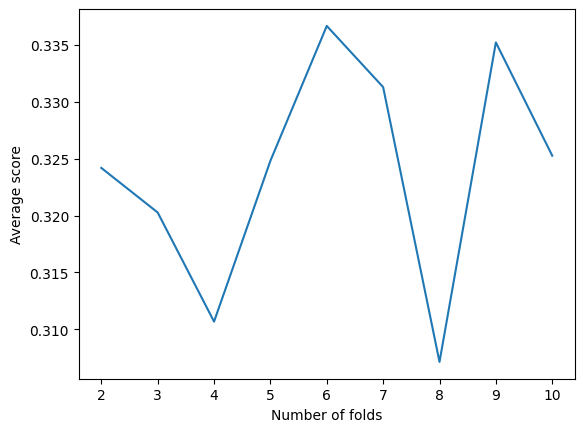

In [32]:
# Definindo os possíveis números de folds
num_folds = list(range(2, 11))

avg_scores = []

for k in num_folds:
    # Realizando a validação cruzada k-fold
    # Usando o coeficiente de determinação R² como métrica
    scores = cross_val_score(RandomForestRegressor(random_state=42), X, y, cv=k, scoring='r2')
    
    avg_score = np.mean(scores)
    avg_scores.append(avg_score)

    print(f'Number of folds: {k}, Average score: {avg_score}')

plt.plot(num_folds, avg_scores)
plt.xlabel('Number of folds')
plt.ylabel('Average score')
plt.show()


Com base nos resultados, o melhor número de folds é 6, pois teve a pontuação mais alta. Portanto, 6 seria o número ótimo de folds.

## Implementação do modelo RandomForestRegressor

In [33]:
# Definindo os hiperparâmetros para a busca em grade

# n_estimators: Este é o número de árvores na floresta. Geralmente, um número maior de árvores aumenta o desempenho e torna as previsões mais estáveis, mas também pode tornar a computação mais lenta.
# max_depth: A profundidade máxima das árvores. Se None, os nós são expandidos até que todas as folhas sejam puras ou até que todas as folhas contenham menos do que min_samples_split amostras. Se especificado como um número inteiro, isso limita a profundidade das árvores na floresta. Isso pode ajudar a evitar overfitting.
# min_samples_split: O número mínimo de amostras necessárias para dividir um nó interno. Se esse valor for maior, isso pode ajudar a prevenir overfitting, mas se for muito alto, pode levar ao underfitting.
# min_samples_leaf: O número mínimo de amostras necessárias para ser uma folha (um nó final da árvore). 

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Criando instância do RandomForestRegressor e GridSearchCV
rf = RandomForestRegressor(random_state=random_state_value)

grid_search = GridSearchCV(rf, param_grid, cv=cv_value, scoring='neg_mean_squared_error')

# Ajustando o modelo aos dados de treinamento
grid_search.fit(X_train, y_train)

# Melhores hiperparâmetros encontrados
print(grid_search.best_params_)

# Prevendo os valores de y para os dados de teste usando o melhor modelo encontrado
y_pred = grid_search.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
rmsle = np.sqrt(mean_squared_log_error(y_test + 0.01, y_pred + 0.01))

print("RMSE: ", rmse)
print("MSE: ", mse)
print("MAE: ", mae)
print("RMSLE: ", rmsle)
print("R2: ", r2)


{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
RMSE:  52328.15796731386
MSE:  2738236116.2521534
MAE:  38279.91302509241
RMSLE:  0.47598541336002764
R2:  0.3739846552904367


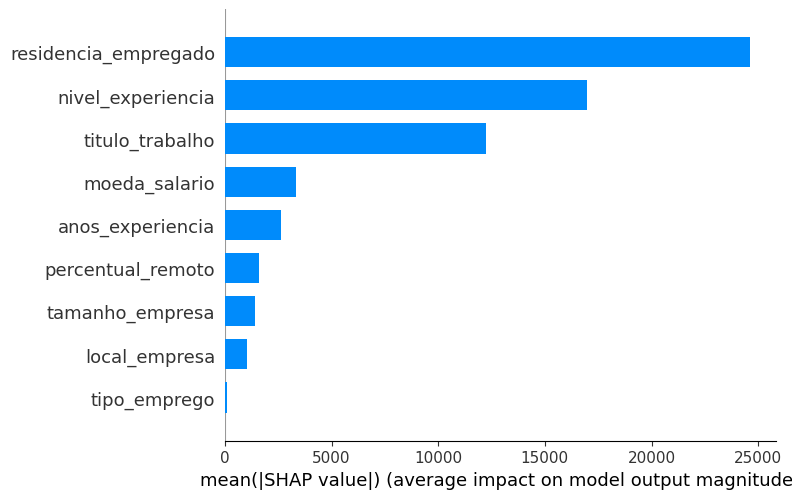

In [34]:
# Calculando os valores SHAP para todas as instâncias de teste
explainer = shap.TreeExplainer(grid_search.best_estimator_)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")


Com base na análise do gráfico do SHAP, as maiores barras indicam as características mais importantes para o modelo em relação à previsão do salário em dólar. As características mencionadas, em ordem de importância, são:

* **residencia_empregado**: Esta característica tem a **maior contribuição para as previsões do modelo.** Isso significa que o país de residência do funcionário tem um impacto significativo no salário em dólar.

* **nivel_experiencia**: A experiência do empregado também tem uma contribuição importante para as previsões do modelo. Quanto maior o nível de experiência, maior é o impacto no salário em dólar.

* **titulo_trabalho**: O papel ou título do funcionário também é um fator relevante para as previsões do modelo. Diferentes títulos de trabalho têm diferentes níveis de contribuição para o salário em dólar.

* **moeda_salario**: A moeda em que o salário foi pago também influencia as previsões do modelo. A conversão para dólar afeta o valor do salário em dólar.

* **anos_experiencia**: O número de anos de experiência é outro fator importante para as previsões do modelo. Quanto mais anos de experiência, maior é a contribuição para o salário em dólar.

Essas informações fornecem uma compreensão das características mais relevantes para as previsões do modelo.

In [35]:
# Iniciando uma execução do MLflow
run_name = create_new_run_name('RandomForestRegressor')
with mlflow.start_run(run_name=run_name, nested=True):
    mlflow.log_param("model_id", "RandomForestRegressor")
    # Logando todas as features usadas
    for i, feature in enumerate(X.columns):
        mlflow.log_param(f"feature_{i}", feature)

    # Registrando os parâmetros
    mlflow.log_param("n_estimators", grid_search.best_params_['n_estimators'])
    mlflow.log_param("max_depth", grid_search.best_params_['max_depth'])
    mlflow.log_param("min_samples_split", grid_search.best_params_['min_samples_split'])
    mlflow.log_param("min_samples_leaf", grid_search.best_params_['min_samples_leaf'])
    mlflow.log_param("cv", cv_value)
    mlflow.log_param("random_state", random_state_value)

    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("rmsle", rmsle)
    mlflow.log_metric("r2", r2)

    # Fazendo o upload do modelo no MLflow
    mlflow.sklearn.log_model(rf, "model")


Setuptools is replacing distutils.


# Auto ML H2O

In [36]:
h2o.init()
# Iniciando o servidor do MLflow
mlflow.start_run()

# Convertendo o DataFrame original para um objeto H2OFrame
h2o_df = h2o.H2OFrame(df)

# Definindo as colunas de entrada (variáveis preditoras) e a coluna alvo
x = h2o_df.col_names
x.remove('salario_em_dolar')
y = 'salario_em_dolar'

# Treinando o AutoML usando os dados
automl = H2OAutoML(max_models=10, seed=42)
automl.train(x=x, y=y, training_frame=h2o_df)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.19" 2023-04-18; OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpt_gdeakr
  JVM stdout: /tmp/tmpt_gdeakr/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpt_gdeakr/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,1 month and 14 days
H2O_cluster_name:,H2O_from_python_unknownUser_2kw5tm
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_4_AutoML_1_20230612_13507


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    33                 33                          32771                  10           10           10            34            100           74.4848

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 2063821912.2892098
RMSE: 45429.306755542835
MAE: 33588.591673670904
RMSLE: 0.3864626495817862
Mean Residual Deviance: 2063821912.2892098

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 2515050469.4035287
RMSE: 50150.27885668761
MAE: 37175.42400642166
RMSLE: 0.44381580186250374
Mean Residual Deviance: 2515050469.4035287

Cross-Validation Metrics Summary: 
                        mean         sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     37273        1050.72     37294.5       37476.1       38320.9       35526.2       37747.2
mean_residual_deviance  2.53289e+09  2.3421e+08  2.43994e+09   2.54279e+09   2.809e+09     2.19574e+09   2.67701e+09
mse                     2.53289e+09  2.3421e+08  2.43994e+09   2.54279e+09   2.809e+09     2.19574e+09   2.67701e+09
r2                      0.436915     0.0514448   0.459971      0.390157      0.380069      0.503579      0.4508
residual_deviance       2.53289e+09  2.3421e+08  2.43994e+09   2.54279e+09   2.809e+09     2.19574e+09   2.67701e+09
rmse                    50284.1      2347.23     49395.7       50426.1       53000         46858.7       51739.8
rmsle                   0.441762     0.01599     0.451767      0.46286       0.430217      0.440728      0.423238

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-06-12 01:35:37  3.075 sec   0                  67123.8          52953.8         4.50561e+09
    2023-06-12 01:35:37  3.125 sec   5                  56226.2          43727.3         3.16139e+09
    2023-06-12 01:35:37  3.168 sec   10                 50558.1          38710.3         2.55612e+09
    2023-06-12 01:35:37  3.216 sec   15                 48049.4          36337.3         2.30874e+09
    2023-06-12 01:35:37  3.265 sec   20                 46801.1          35000.5         2.19034e+09
    2023-06-12 01:35:38  3.313 sec   25                 46101.2          34249.7         2.12532e+09
    2023-06-12 01:35:38  3.355 sec   30                 45660.5          33807.7         2.08488e+09
    2023-06-12 01:35:38  3.381 sec   33                 45429.3          33588.6         2.06382e+09

Variable Importances: 
variable              relative_importance    scaled_importance    percentage
--------------------  ---------------------  -------------------  ------------
residencia_empregado  1.40028e+13            1                    0.442976
titulo_trabalho       6.22728e+12            0.444718             0.196999
nivel_experiencia     4.73926e+12            0.338451             0.149926
local_empresa         3.11177e+12            0.222225             0.0984403
anos_experiencia      1.06574e+12            0.0761096            0.0337147
moeda_salario         1.03788e+12            0.0741199            0.0328333
tamanho_empresa       7.69246e+11            0.0549353            0.024335
percentual_remoto     6.49345e+11            0.0463726            0.0205419
tipo_emprego          7.41108e+09            0.000529258          0.000234449

[ti

In [37]:
# Iterar através de cada modelo 
for model_id in automl.leaderboard['model_id'].as_data_frame().values.flatten():
    model = h2o.get_model(model_id)

    # Obter as métricas do modelo
    performance = model.model_performance()
    rmse = performance.rmse()
    mse = performance.mse()
    mae = performance.mae()
    rmsle = performance.rmsle()
    r2 = performance.r2()

    try:
        new_run_name = create_new_run_name('H2O')
        with mlflow.start_run(run_name=new_run_name, nested=True):
            # Use model_id como o nome da execução
            mlflow.log_param("model_id", model_id)
            # Logar todas as features usadas
            for i, feature in enumerate(x):
                mlflow.log_param(f"feature_{i}", feature)

            # Logar as métricas
            mlflow.log_metric("rmse", rmse)
            mlflow.log_metric("mse", mse)
            mlflow.log_metric("mae", mae)
            mlflow.log_metric("rmsle", rmsle)
            mlflow.log_metric("r2", r2)
            
            # Log do modelo
            mlflow.h2o.log_model(model, "model")
    except MlflowException as e:
        print("Erro ao logar modelo no MLFlow:", e)


# Encerrar a execução do MLFLOW


In [38]:
mlflow.end_run()

# Conclusão

Com base nos resultados das métricas apresentadas, é evidente que o modelo H2O XGBoost superou o modelo RandomForestRegressor.

Podemos concluir isso analisando as métricas:

* **MAE (Erro Absoluto Médio):** O MAE do modelo H2O XGBoost foi de 31377.9, enquanto o do RandomForestRegressor foi de 38279.9. Um MAE menor significa que o modelo H2O XGBoost teve menos erros ao fazer previsões.

* **MSE (Erro Quadrático Médio):** O MSE do modelo H2O XGBoost foi de 1841165836, enquanto o do RandomForestRegressor foi de 2738236116.3. O MSE penaliza erros maiores, o que significa que quanto menor o MSE, melhor o desempenho do modelo. Isso indica que o modelo H2O XGBoost teve menos e menores erros de previsão.

* **R^2 (Coeficiente de Determinação):** O R^2 do modelo H2O XGBoost foi de 0.591, enquanto o do RandomForestRegressor foi de 0.374. O R^2 pode ser interpretado como a proporção da variação na variável dependente que é previsível a partir das variáveis independentes. Portanto, um R^2 maior para o modelo H2O XGBoost significa que ele explica uma proporção maior da variabilidade nos dados.

* **RMSE (Raiz do Erro Quadrático Médio):** O RMSE do modelo H2O XGBoost foi de 42908.8, enquanto o do RandomForestRegressor foi de 52328.2. O RMSE é uma medida de desempenho que penaliza erros maiores. Um RMSE menor para o modelo H2O XGBoost significa que ele teve menos e menores erros de previsão.

Portanto, de acordo com todas essas métricas de avaliação do modelo, podemos concluir que o modelo H2O XGBoost tem um desempenho superior ao modelo RandomForestRegressor para este conjunto de dados e tarefa de previsão.

# Previsão utilizando o modelo Random Forest Regressor

In [39]:
# Definindo as colunas e os dados do novo funcionário
colunas = ['nivel_experiencia', 'tipo_emprego', 'titulo_trabalho', 'moeda_salario', 'residencia_empregado', 'percentual_remoto', 'local_empresa', 'tamanho_empresa', 'anos_experiencia']
novo_funcionario = np.array([[3, 2, 84, 0, 26, 100, 25, 0, 0]])  # Insira os valores das características do novo funcionário aqui
df_novo_funcionario = pd.DataFrame(novo_funcionario, columns=colunas)

# Previsão para o novo funcionário usando o melhor modelo encontrado
salario_previsto = grid_search.predict(df_novo_funcionario)
print("Salário previsto: ", salario_previsto)

Salário previsto:  [103590.15269163]


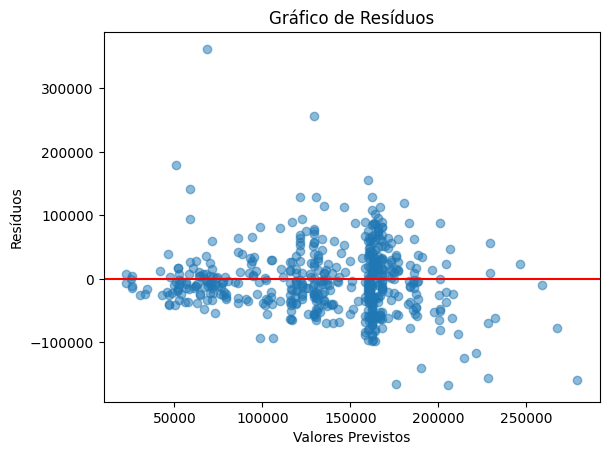

In [40]:
# Calculando os resíduos
residuos = y_test - y_pred

# Criando um scatter plot dos valores previstos e dos resíduos
plt.scatter(y_pred, residuos, alpha=0.5)
plt.title('Gráfico de Resíduos')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.axhline(y=0, color='r', linestyle='-') # Adiciona uma linha horizontal em y=0
plt.show()

**eixo x** = valores previstos

**eixo y** = resíduos (a diferença entre os valores previstos e os reais). 

* Cada ponto no gráfico representa uma previsão individual.

* A linha vermelha em y=0 representa um resíduo de zero, ou seja, previsões perfeitas onde o valor previsto é exatamente igual ao valor real.

De acordo com a oscilação do gráfico de resíduos, o modelo indica não está capturando completamente a relação entre as variáveis de entrada e a variável de saída.

# Previsão utilizando um dos melhores modelos obtidos pelo H2O (XGBoost, 59%)
https://dagshub.com/mtsfreitas/ccf726tp3/experiments/#/experiment/m_929ffb5259a14e3b9be75962b613e69a

In [41]:
# Carregando o melhor modelo H2O que utilizou GLM.
model = mlflow.h2o.load_model("runs:/929ffb5259a14e3b9be75962b613e69a/model")

colunas = ['nivel_experiencia', 'tipo_emprego', 'titulo_trabalho', 'moeda_salario', 
           'residencia_empregado', 'percentual_remoto', 'local_empresa', 'tamanho_empresa', 
           'anos_experiencia']

novo_funcionario = [3, 2, 84, 0, 26, 100, 25, 0, 0]

novo_funcionario_df = pd.DataFrame([novo_funcionario], columns=colunas)

# Converter o DataFrame do Pandas para um H2OFrame
novo_funcionario_h2o = h2o.H2OFrame(novo_funcionario_df)

predictions = model.predict(novo_funcionario_h2o)

print(predictions)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
  predict
  87950.4
[1 row x 1 column]



# Link para os experimentos no Dagshub
https://dagshub.com/mtsfreitas/ccf726tp3/experiments/